Here, we are predicting the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides or damaged by other reasons with the help of various variables. We will be using classifciation model as our target variable has categorical data with more than 2 categories

In [1]:
#Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the train and test Dataset
Train_data=pd.read_excel(r'E:\Python Practice\train_agriculture.xlsx')

Test_data=pd.read_excel(r'E:\Python Practice\test_agriculture.xlsx')

In [3]:
Train_data.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [4]:
Test_data.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [5]:
Train_data.shape

(4599, 10)

In [6]:
Test_data.shape

(1199, 9)

Here, test data does not have target variable-Crop_Damage

Will be first analysing the train data and then test data

# Train data

# EDA

In [7]:
Train_data

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


Understanding the data and its variables/factors:
    1. ID column could have all the unique data in it and hence can be dropped.
    2. there are Null values present in the data
    3. Here, in target column(Crop_Damage)-0 denotes that the crops are alive, 1 denotes damaged due to other reasons and 2 denotes damage due to pesticides.

In [8]:
Train_data.ID.value_counts()

F00007551    1
F00007977    1
F00002569    1
F00005405    1
F00002494    1
            ..
F00004109    1
F00000141    1
F00003700    1
F00004245    1
F00004137    1
Name: ID, Length: 4599, dtype: int64

In [9]:
Train_data['ID'].unique()

array(['F00000001', 'F00000003', 'F00000004', ..., 'F00008080',
       'F00008082', 'F00008083'], dtype=object)

From above, it is ascertained that all the data in ID has unique values and hence cant be of much use in determining the target and hence can drop the smae.

In [10]:
Train_data.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [11]:
#Dropping non-relevant and object dtype column

Train_data.drop(['ID' ], axis=1, inplace=True)

In [12]:
Train_data.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1


In [13]:
Train_data.isnull().sum()

Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

Only 'Number_Weeks_Used' has null values in it and hence will be filling the same with mean as it is int/float data type

In [14]:
Train_data['Number_Weeks_Used'].fillna(Train_data['Number_Weeks_Used'].mean(), inplace=True)

In [15]:
Train_data.isnull().values.any()

False

Null values has been filles

In [16]:
Train_data.skew()

Estimated_Insects_Count    0.911469
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.945895
Number_Weeks_Used          0.278664
Number_Weeks_Quit          0.919771
Season                     0.144841
Crop_Damage                2.306933
dtype: float64

There are skewness present in Crop_Type, Estimated_Insects_Count, Number_Doses_Week, Number_Weeks_Quit will have to treat the same.

# Statistical Summary

In [17]:
Train_data.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,11.965785,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.891027,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


Key observation:

1. mean is greater than median in Number_Doses_Week, Number_Weeks_Quit columns, hence the data has skewness.
2. since the difference between 75% and max values are huge in most of the columns, there could be outliers also present in the data.
3. All the column has same count, hence no null values present.

# Visualization

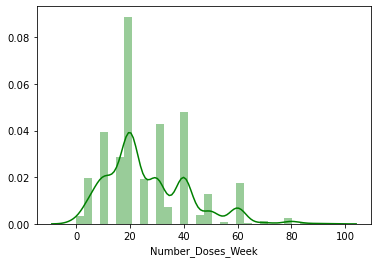

In [18]:
#Univariate Analysis- checking skewness
sns.distplot(Train_data['Number_Doses_Week'], color='g')

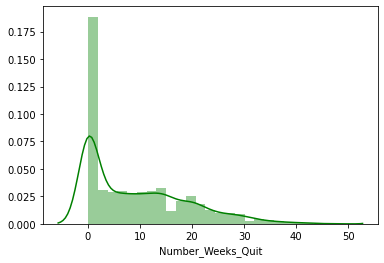

In [19]:
sns.distplot(Train_data['Number_Weeks_Quit'], color='g')

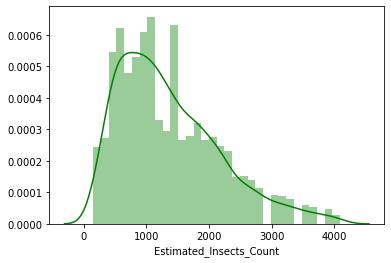

In [20]:
sns.distplot(Train_data['Estimated_Insects_Count'], color='g')

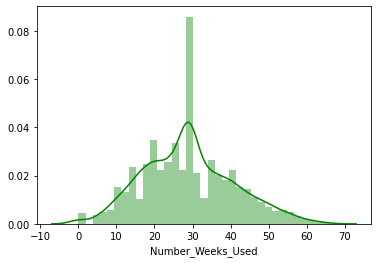

In [21]:
sns.distplot(Train_data['Number_Weeks_Used'], color='g')

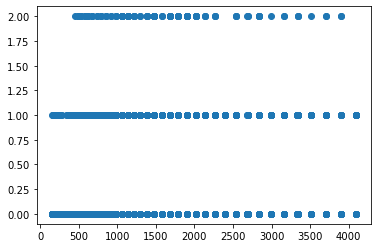

In [22]:
#bivariate analysis

plt.scatter(Train_data['Estimated_Insects_Count'],Train_data['Crop_Damage'])

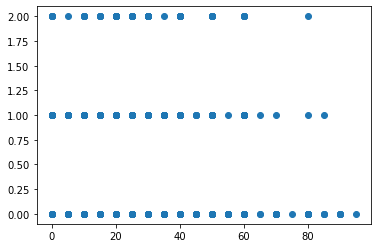

In [23]:
plt.scatter(Train_data['Number_Doses_Week'],Train_data['Crop_Damage'])

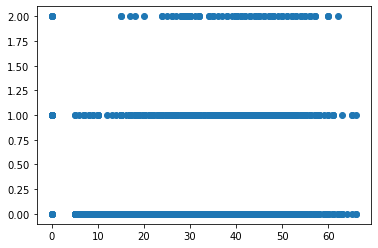

In [24]:
plt.scatter(Train_data['Number_Weeks_Used'],Train_data['Crop_Damage'])

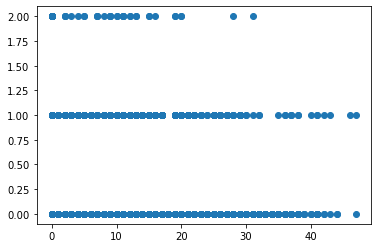

In [25]:
plt.scatter(Train_data['Number_Weeks_Quit'],Train_data['Crop_Damage'])

# Correlation

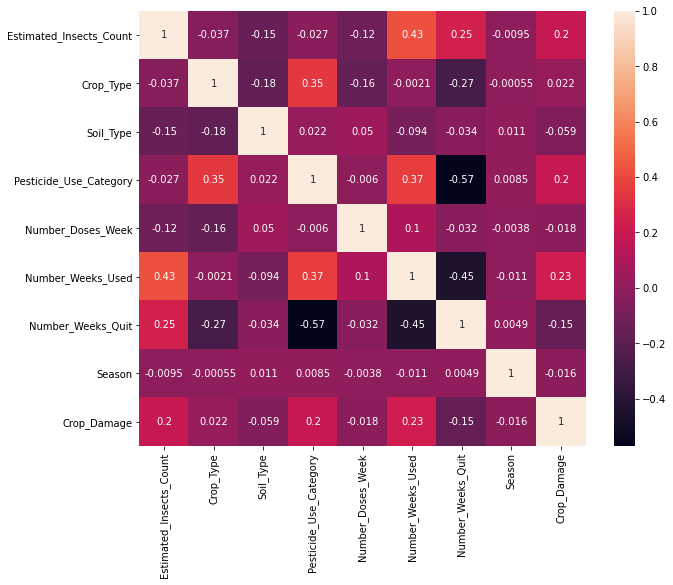

In [26]:
#Checking Correlation with multivariate analysis

plt.figure(figsize=(10,8))
sns.heatmap(Train_data.corr(),annot=True)

Text(0.5, 1.0, 'correlation with target variable')

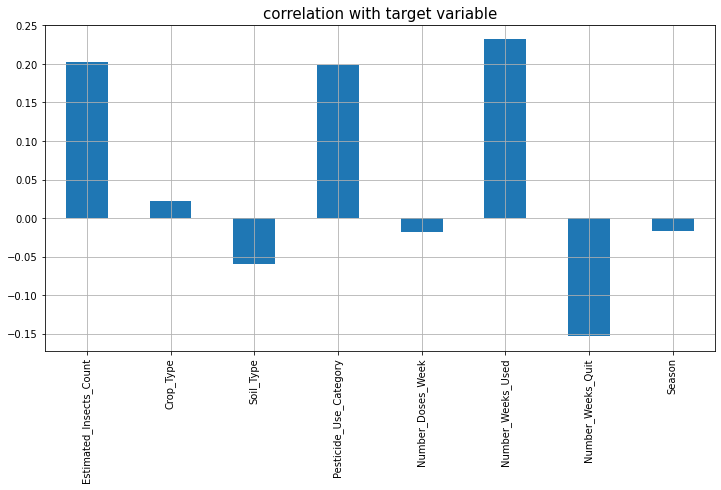

In [27]:
plt.figure(figsize=(12,6))
Train_data.drop('Crop_Damage', axis=1).corrwith(Train_data['Crop_Damage']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title('correlation with target variable',fontsize=15)

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64


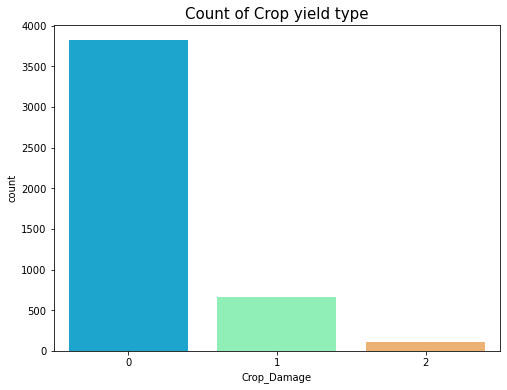

In [28]:
plt.figure(figsize=(8,6))
sns.countplot(x='Crop_Damage',data=Train_data,palette='rainbow')
plt.title('Count of Crop yield type',fontsize=15)

print(Train_data['Crop_Damage'].value_counts())

From above, it is known that most of the crops are alive.

0    3565
1    1034
Name: Crop_Type, dtype: int64


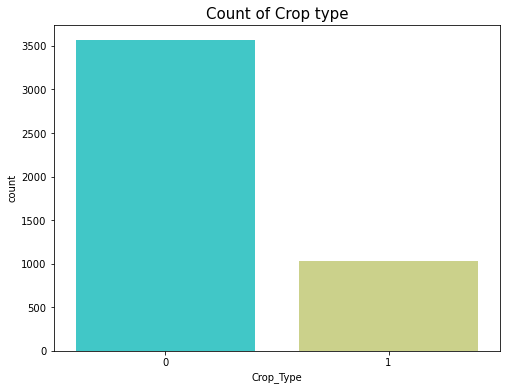

In [29]:
plt.figure(figsize=(8,6))
sns.countplot(x='Crop_Type',data=Train_data,palette='rainbow')
plt.title('Count of Crop type',fontsize=15)

print(Train_data['Crop_Type'].value_counts())

2    3205
3    1349
1      45
Name: Pesticide_Use_Category, dtype: int64


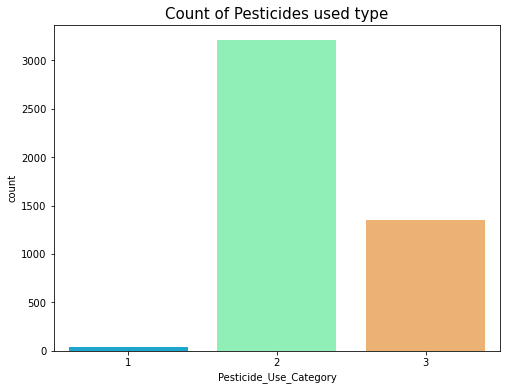

In [30]:
plt.figure(figsize=(8,6))
sns.countplot(x='Pesticide_Use_Category',data=Train_data,palette='rainbow')
plt.title('Count of Pesticides used type',fontsize=15)

print(Train_data['Pesticide_Use_Category'].value_counts())

Pesticides used are mostly of previously used type

Text(0.5, 1.0, 'Count of Number_of_Weeks_Quit')

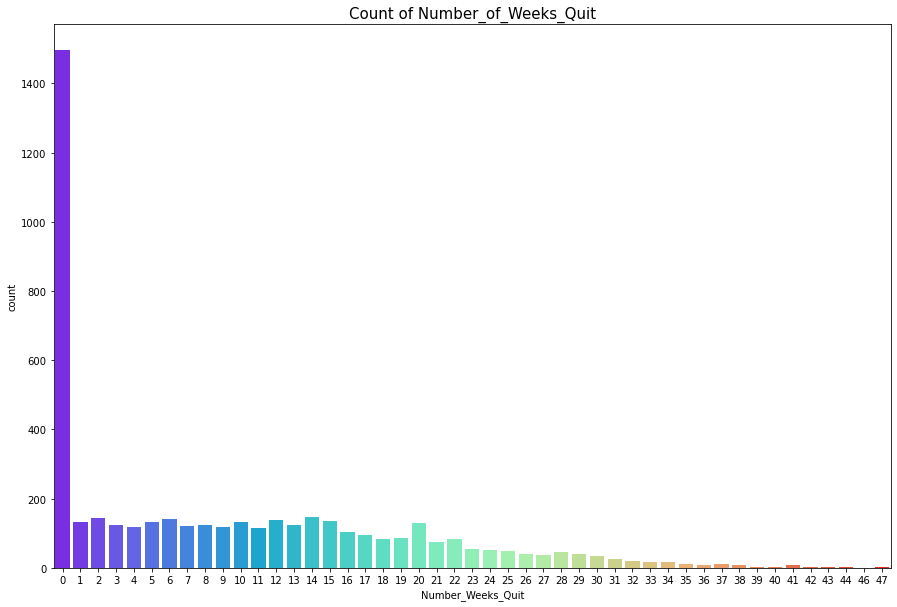

In [88]:
plt.figure(figsize=(15,10))
sns.countplot(x='Number_Weeks_Quit',data=Train_data,palette='rainbow')
plt.title('Count of Number_of_Weeks_Quit',fontsize=15)


In [32]:
#Bivariate Analysis

Text(0, 0.5, 'Crop Type')

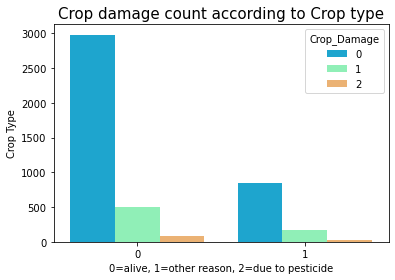

In [33]:
#Exploring Crop_Type vs Crop_damage

plt.title('Crop damage count according to Crop type',fontsize=15)
sns.countplot(x="Crop_Type",hue='Crop_Damage',data=Train_data,palette='rainbow')
plt.xlabel('0=alive, 1=other reason, 2=due to pesticide')
plt.ylabel('Crop Type')


Most of the damage crops are found of crop type 0 and alive count is also highest in the crop type 0
Very less amount of crops got damage of crop type 1

Text(0, 0.5, 'Count of Season')

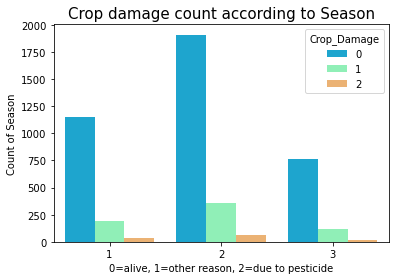

In [34]:
#Exploring Season vs Crop_damage

plt.title('Crop damage count according to Season',fontsize=15)
sns.countplot(x="Season",hue='Crop_Damage',data=Train_data,palette='rainbow')
plt.xlabel('0=alive, 1=other reason, 2=due to pesticide')
plt.ylabel('Count of Season')


Text(0, 0.5, 'Count of Pesticide Used Category')

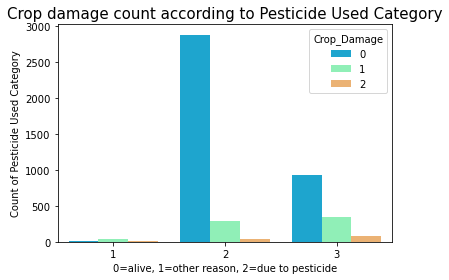

In [35]:
#Exploring Pesticide_Use_Category vs Crop_damage

plt.title('Crop damage count according to Pesticide Used Category',fontsize=15)
sns.countplot(x="Pesticide_Use_Category",hue='Crop_Damage',data=Train_data,palette='rainbow')
plt.xlabel('0=alive, 1=other reason, 2=due to pesticide')
plt.ylabel('Count of Pesticide Used Category')

Text(0, 0.5, 'Count of Soil_Type')

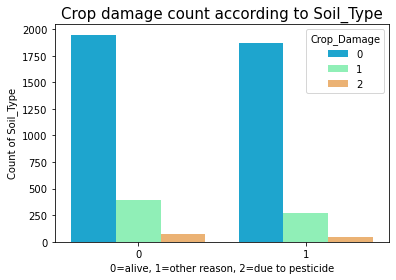

In [36]:
#Exploring Soil_Type vs Crop_damage

plt.title('Crop damage count according to Soil_Type',fontsize=15)
sns.countplot(x="Soil_Type",hue='Crop_Damage',data=Train_data,palette='rainbow')
plt.xlabel('0=alive, 1=other reason, 2=due to pesticide')
plt.ylabel('Count of Soil_Type')

Text(0, 0.5, 'Count of Number_Doses_Week')

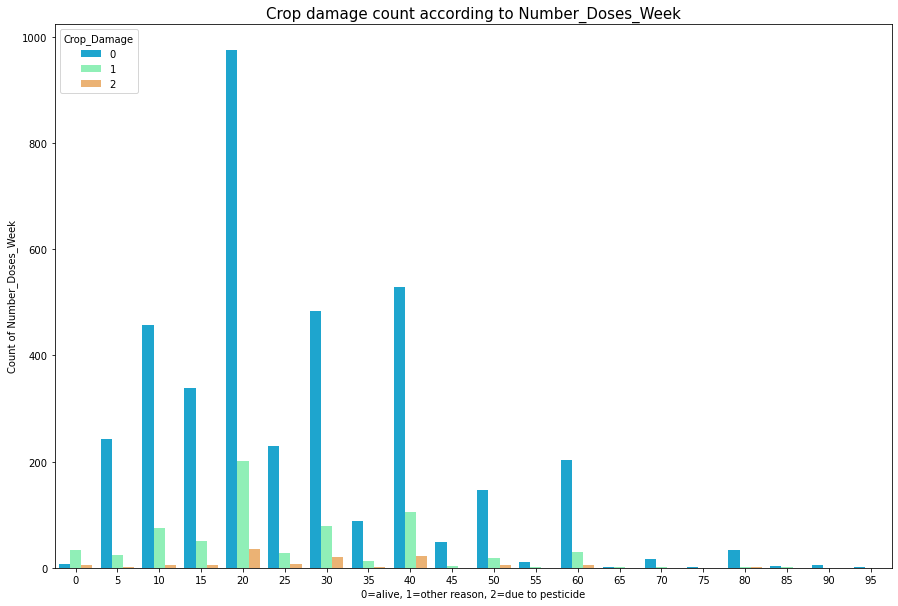

In [37]:
#Exploring Number_Doses_Week vs Crop_damage
plt.figure(figsize=(15,10))
plt.title('Crop damage count according to Number_Doses_Week',fontsize=15)
sns.countplot(x="Number_Doses_Week",hue='Crop_Damage',data=Train_data,palette='rainbow')
plt.xlabel('0=alive, 1=other reason, 2=due to pesticide')
plt.ylabel('Count of Number_Doses_Week')

Can see, when the no of doses is 20 per week the chances of crop being alive is highest.
Whereas over dosed are badly affecting the cultivation.

# Checking Outliers

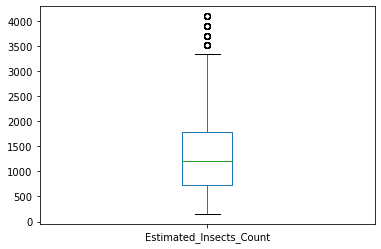

In [38]:
Train_data['Estimated_Insects_Count'].plot.box()

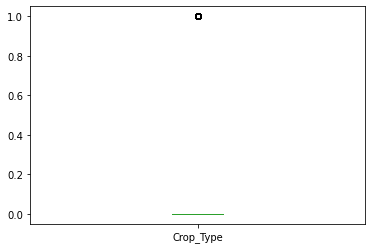

In [39]:
Train_data['Crop_Type'].plot.box()

In [40]:
Train_data.columns

Index(['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

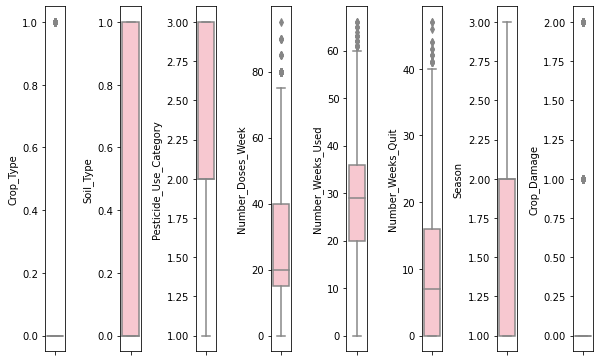

In [41]:
collist=Train_data.columns.values
ncol=10
nrows=10

plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(Train_data[collist[i]], color='pink', orient='v')
    plt.tight_layout()

In [42]:
#removing outliers using zscore method

from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(Train_data))
threshold=3
new_Train_data=Train_data[(z<3).all(axis=1)]

In [43]:
Train_data.shape

(4599, 9)

In [44]:
new_Train_data.shape

(4370, 9)

In [45]:
Percentage_loss=((4599-4370)/4599)*100
Percentage_loss

4.979343335507719

There is no much data loss, hence we can go ahead with the outliers removed data

# Treating Skewness

In [46]:
#first, we are defining the x & y
x=new_Train_data.drop('Crop_Damage',axis=1)
y=new_Train_data['Crop_Damage']

In [47]:
x

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,0,1,0,0.000000,0,1
1,209,1,0,1,0,0.000000,0,2
2,257,1,0,1,0,0.000000,0,2
3,257,1,1,1,0,0.000000,0,2
4,342,1,0,1,0,0.000000,0,2
...,...,...,...,...,...,...,...,...
4594,2138,0,1,2,20,28.891027,1,1
4595,2139,0,1,2,30,47.000000,2,1
4596,2267,0,1,2,10,7.000000,27,2
4597,2267,0,1,2,10,20.000000,24,2


In [48]:
y

0       0
1       1
2       1
3       1
4       1
       ..
4594    1
4595    1
4596    0
4597    0
4598    0
Name: Crop_Damage, Length: 4370, dtype: int64

In [49]:
#Treating Skewness
from sklearn.preprocessing import power_transform

x=power_transform(x,method='yeo-johnson')

In [50]:
new_Train_data.skew()

Estimated_Insects_Count    0.789806
Crop_Type                  1.308548
Soil_Type                  0.079724
Pesticide_Use_Category     0.753578
Number_Doses_Week          0.711083
Number_Weeks_Used          0.275330
Number_Weeks_Quit          0.813382
Season                     0.141605
Crop_Damage                2.003206
dtype: float64

# Model Builiding

In [51]:
#scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [52]:
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [53]:
#splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=43)

In [54]:
#Checking different models

In [55]:
svc=SVC(kernel='rbf')

svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)

print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8596673596673596
[[820   2]
 [133   7]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       822
           1       0.78      0.05      0.09       140

    accuracy                           0.86       962
   macro avg       0.82      0.52      0.51       962
weighted avg       0.85      0.86      0.80       962



In [56]:
dtc=DecisionTreeClassifier(criterion='gini')

dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)

print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7765072765072765
[[700 122]
 [ 93  47]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       822
           1       0.28      0.34      0.30       140

    accuracy                           0.78       962
   macro avg       0.58      0.59      0.59       962
weighted avg       0.79      0.78      0.78       962



In [57]:
knn=KNeighborsClassifier(10)

knn.fit(x_train,y_train)
predknn=knn.predict(x_test)

print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8565488565488566
[[802  20]
 [118  22]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       822
           1       0.52      0.16      0.24       140

    accuracy                           0.86       962
   macro avg       0.70      0.57      0.58       962
weighted avg       0.82      0.86      0.82       962



Since the best performing model is knn with almost 86% accuracy we will save that model for our future prediction

# Model Saving

In [58]:
import pickle
filename= 'Agriculture.pkl'
pickle.dump(knn, open(filename, 'wb'))

# Conclusion

In [59]:
import numpy as np
a=np.array(y_test)
predicted=np.array(knn.predict(x_test))

df_con=pd.DataFrame({'original':a,'predicted':predicted}, index= range(len(a)))
df_con

,original,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
957,1,0
958,0,0
959,0,0
960,0,0


We can observe, some are predicted well but there are still some scope of improvement in prediction

# Working on Test Data

In [60]:
Test_data

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,2,40,34.0,7,3
1195,F00003135,1132,0,1,2,40,25.0,3,1
1196,F00003138,1132,0,1,2,20,13.0,23,1
1197,F00003149,1212,0,1,2,10,35.0,5,1


# EDA

Will be doing EDA and data preparation as we have done above

In [63]:
Test_data['ID'].unique()

array(['F00000002', 'F00000007', 'F00000011', ..., 'F00003138',
       'F00003149', 'F00003150'], dtype=object)

In [64]:
Test_data.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
dtype: object

In [65]:
#Dropping non-relevant and object dtype column

Test_data.drop(['ID' ], axis=1, inplace=True)

In [67]:
Test_data.isnull().sum()

Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

In [69]:
#filling NaN
Test_data['Number_Weeks_Used'].fillna(Test_data['Number_Weeks_Used'].mean(), inplace=True)

In [73]:
Test_data.isnull().values.any()

False

In [74]:
Test_data.skew()

Estimated_Insects_Count    1.098665
Crop_Type                  1.546968
Soil_Type                  0.179422
Pesticide_Use_Category     0.089675
Number_Doses_Week          0.872028
Number_Weeks_Used          0.220343
Number_Weeks_Quit          1.191013
Season                     0.155872
dtype: float64

There are skewness present in Crop_Type, Estimated_Insects_Count, Number_Doses_Week, Number_Weeks_Quit will have to treat the same.

# Statistical Summary

In [75]:
Test_data.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000
mean,1288.737281,0.194329,0.455379,2.383653,26.555463,29.033333,7.052544,1.881568
std,845.004912,0.395848,0.498213,0.522866,16.154101,12.130647,8.863634,0.685640
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,677.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000
50%,1056.000000,0.000000,0.000000,2.000000,20.000000,29.033333,3.000000,2.000000
75%,1785.000000,0.000000,1.000000,3.000000,40.000000,36.000000,13.000000,2.000000
max,4097.000000,1.000000,1.000000,3.000000,90.000000,64.000000,42.000000,3.000000


Key observation:

1. mean is greater than median in Number_Doses_Week, Number_Weeks_Quit columns, hence the data has skewness.
2. since the difference between 75% and max values are huge in most of the columns, there could be outliers also present in the data.
3. All the column has same count, hence no null values present.

# Visualization

In [76]:
#Checking Skewness

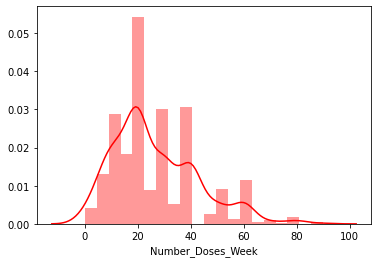

In [81]:
sns.distplot(Test_data['Number_Doses_Week'], color='r')

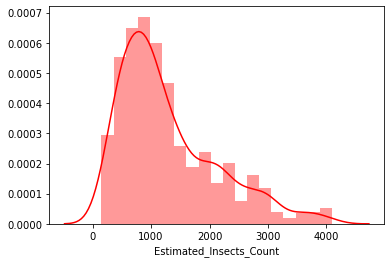

In [83]:
sns.distplot(Test_data['Estimated_Insects_Count'], color='r')

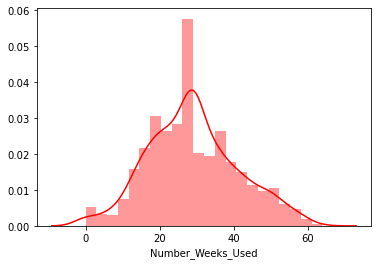

In [86]:
sns.distplot(Test_data['Number_Weeks_Used'], color='r')

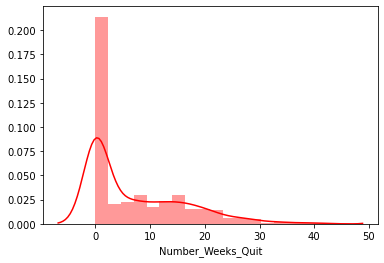

In [87]:
sns.distplot(Test_data['Number_Weeks_Quit'], color='r')

In [89]:
#Checking the counts

0    966
1    233
Name: Crop_Type, dtype: int64


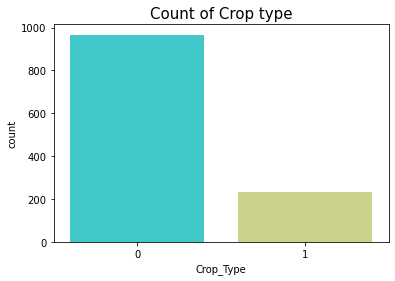

In [97]:
plt.figure(figsize=(6,4))
sns.countplot(x='Crop_Type',data=Test_data,palette='rainbow')
plt.title('Count of Crop type',fontsize=15)

print(Test_data['Crop_Type'].value_counts())

0    653
1    546
Name: Soil_Type, dtype: int64


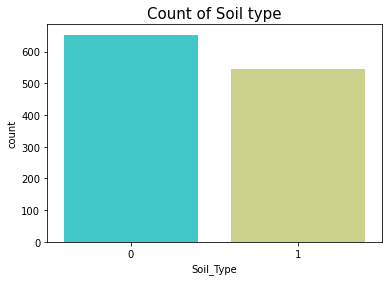

In [98]:
plt.figure(figsize=(6,4))
sns.countplot(x='Soil_Type',data=Test_data,palette='rainbow')
plt.title('Count of Soil type',fontsize=15)

print(Test_data['Soil_Type'].value_counts())

20    293
40    166
30    162
10    156
15     99
5      70
60     62
50     50
25     48
35     28
0      22
45     14
80     10
55      7
70      6
65      3
90      2
75      1
Name: Number_Doses_Week, dtype: int64


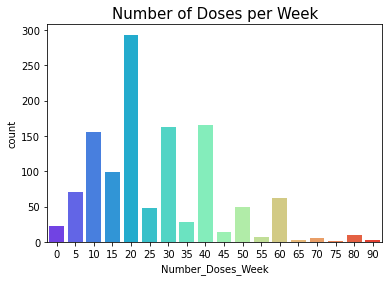

In [101]:
plt.figure(figsize=(6,4))
sns.countplot(x='Number_Doses_Week',data=Test_data,palette='rainbow')
plt.title('Number of Doses per Week',fontsize=15)

print(Test_data['Number_Doses_Week'].value_counts())

2    619
1    361
3    219
Name: Season, dtype: int64


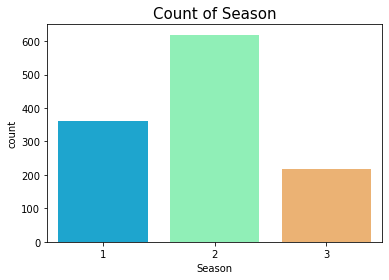

In [105]:
plt.figure(figsize=(6,4))
sns.countplot(x='Season',data=Test_data,palette='rainbow')
plt.title('Count of Season',fontsize=15)

print(Test_data['Season'].value_counts())

# Checking and handling Outliers

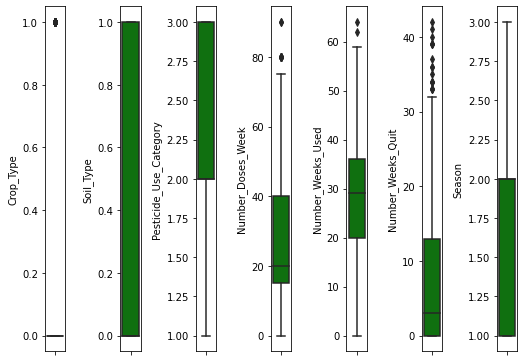

In [106]:
collist=Test_data.columns.values
ncol=10
nrows=10

plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(Test_data[collist[i]], color='green', orient='v')
    plt.tight_layout()

In [107]:
#removing outliers using zscore method

from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(Test_data))
threshold=3
new_Test_data=Test_data[(z<3).all(axis=1)]

In [108]:
Test_data.shape

(1199, 8)

In [109]:
new_Test_data.shape

(1160, 8)

# Treating Skewness

In [110]:
from sklearn.preprocessing import power_transform

new_Test_data=power_transform(new_Test_data,method='yeo-johnson')

# Loading the saved Model

In [112]:
fitted_model=pickle.load(open('Agriculture.pkl','rb'))
fitted_model

KNeighborsClassifier(n_neighbors=10)

# Prediction over Test Data

In [113]:
predictions= fitted_model.predict(Test_data)

In [114]:
predictions

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [119]:
Test_con=pd.DataFrame({'prediction on test':predictions})
Test_con

,prediction on test
0,0
1,1
2,1
3,1
4,1
...,...
1194,0
1195,0
1196,1
1197,0


# Here, done the predictions on test data with the help of our saved model-KNN